In [90]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [91]:
style.use('ggplot')

In [92]:
df_stocks = pd.read_csv('data/jpm_bars_2024-02-20.csv')

In [93]:
# Reset the index
df_stocks['timestamp'] = df_stocks.timestamp.apply(lambda x: x.split(' ')[0])
df_stocks.rename(columns={'timestamp': 'date'}, inplace=True)
df_stocks.drop(['symbol'], axis=1, inplace=True)
df_stocks.set_index('date', inplace=True)

In [94]:
df_stocks.tail()

,open,high,low,close,volume,trade_count,vwap
date,,,,,,,
2024-02-12,174.78,176.8080,173.700,175.79,8539316.0,99614.0,175.753564
2024-02-13,175.32,176.2299,172.615,174.26,8397631.0,119866.0,174.170059
2024-02-14,175.07,176.1000,174.420,176.03,7056664.0,92056.0,175.386226
2024-02-15,176.15,180.2100,176.150,179.87,8723390.0,120899.0,179.302307
2024-02-16,179.61,179.9800,178.160,179.03,8292848.0,99541.0,178.978772


In [95]:
df = df_stocks.copy()

In [96]:
df.columns.tolist()

['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap']

In [97]:
df = df[['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap']]
df['HL_PCT'] = (df['high'] - df['low']) / df['close'] * 100.0
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

In [98]:
df = df[['close', 'HL_PCT', 'PCT_change', 'volume', 'vwap']]
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [99]:
forecast_out

21

In [100]:
df.tail(30)

,close,HL_PCT,PCT_change,volume,vwap,label
date,,,,,,
2024-01-05,172.27,1.108725,0.466554,10064552.0,172.464071,175.10
2024-01-08,172.02,1.671317,0.000000,11229916.0,171.029595,175.43
2024-01-09,170.66,0.993203,-0.559375,9923630.0,170.726095,174.80
2024-01-10,171.02,1.245468,0.600000,9670218.0,170.216570,175.01
2024-01-11,170.30,1.009924,-0.017613,11919498.0,169.646075,175.79
2024-01-12,169.05,4.383319,-2.733026,19433217.0,171.553199,174.26
2024-01-16,167.99,2.256087,1.892400,17206420.0,166.874030,176.03
2024-01-17,167.09,1.544078,-0.149396,11107466.0,167.461792,179.87
2024-01-18,167.42,1.367817,0.179512,9382255.0,166.589725,179.03


In [56]:
X = np.array(df.drop(columns=['label'], axis=1))
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [57]:
df.dropna(inplace=True)

y = np.array(df['label'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [59]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [89]:
last_date = df.iloc[-1].name
last_unix = datetime.datetime.strptime(last_date,'%Y-%m-%d').timestamp()
one_day = 86400
next_unix = last_unix + one_day

KeyboardInterrupt: 

In [61]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

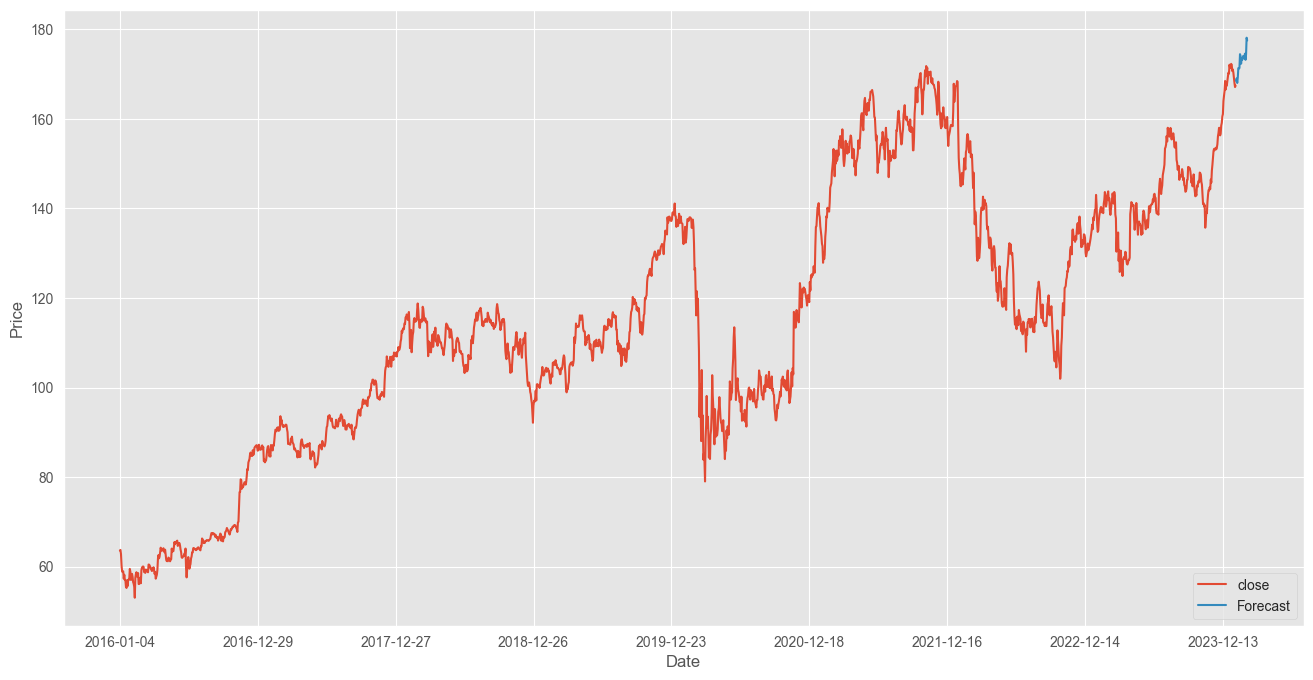

In [62]:
plt.figure(figsize=(16,8))
df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [64]:
df['close'].tail(50)

date
2023-12-06             156.31
2023-12-07             156.79
2023-12-08             158.52
2023-12-11             159.10
2023-12-12             160.52
2023-12-13             161.06
2023-12-14             163.99
2023-12-15             165.23
2023-12-18             166.23
2023-12-19             168.45
2023-12-20             166.55
2023-12-21             167.50
2023-12-22             167.40
2023-12-26             168.39
2023-12-27             169.40
2023-12-28             170.30
2023-12-29             170.10
2024-01-02             172.08
2024-01-03             171.33
2024-01-04             171.41
2024-01-05             172.27
2024-01-08             172.02
2024-01-09             170.66
2024-01-10             171.02
2024-01-11             170.30
2024-01-12             169.05
2024-01-16             167.99
2024-01-17             167.09
2024-01-18             167.42
2024-01-19 00:00:00       NaN
2024-01-20 00:00:00       NaN
2024-01-21 00:00:00       NaN
2024-01-22 00:00:00       NaN
2024-

In [66]:
df['Forecast'].tail(50)

date
2023-12-06                    NaN
2023-12-07                    NaN
2023-12-08                    NaN
2023-12-11                    NaN
2023-12-12                    NaN
2023-12-13                    NaN
2023-12-14                    NaN
2023-12-15                    NaN
2023-12-18                    NaN
2023-12-19                    NaN
2023-12-20                    NaN
2023-12-21                    NaN
2023-12-22                    NaN
2023-12-26                    NaN
2023-12-27                    NaN
2023-12-28                    NaN
2023-12-29                    NaN
2024-01-02                    NaN
2024-01-03                    NaN
2024-01-04                    NaN
2024-01-05                    NaN
2024-01-08                    NaN
2024-01-09                    NaN
2024-01-10                    NaN
2024-01-11                    NaN
2024-01-12                    NaN
2024-01-16                    NaN
2024-01-17                    NaN
2024-01-18                    NaN
2024-01-1

In [87]:
df['Forecast'].index[-100]

'2023-09-26'